In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
SITE_NAME = "NEON.D01.BART.DP1.00033"
YEAR      = 2020

# Get all the files in the directory

In [3]:
def list_files(filepath, filetype):
   paths = []
   for root, dirs, files in os.walk(filepath):
      for file in files:
         if file.lower().endswith(filetype.lower()):
            paths.append(os.path.join(root, file))
   return(paths)

img_files = list_files(f'../data_raw/{SITE_NAME}/{YEAR}', ".jpg")
img_files.sort() # due to the way the file name is set up, sorting will sort it by date as well
img_files

['../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_01_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_02_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_03_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_04_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_05_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_06_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_07_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_08_120005.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_09_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.DP1.00033_2020_01_10_120006.jpg',
 '../data_raw/NEON.D01.BART.DP1.00033/2020/01/NEON.D01.BART.

# get the green mask beginning of the year

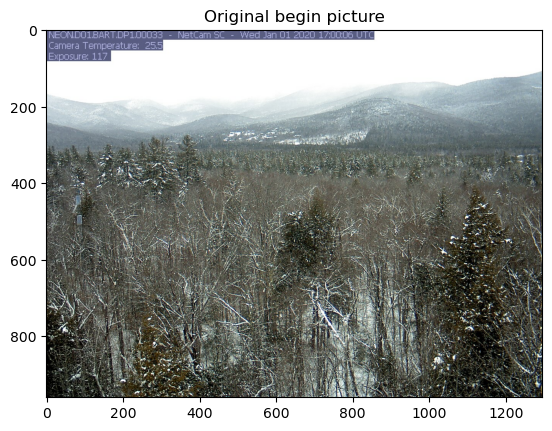

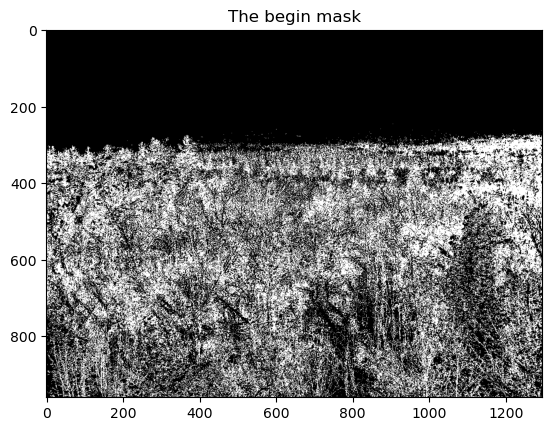

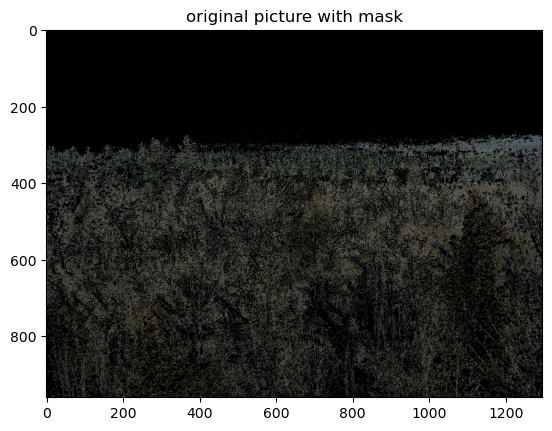

In [4]:
begin_img = "" # set the img you want at beginning here or it will become the first image in the year

begin_img = img_files[0] if begin_img == "" else begin_img

begin_cv_img = cv2.imread(begin_img)
begin_rgb = cv2.cvtColor(begin_cv_img, cv2.COLOR_BGR2RGB)
begin_hsv = cv2.cvtColor(begin_cv_img, cv2.COLOR_BGR2HSV)
begin_mask = cv2.inRange(begin_hsv, (11,16,39), (114,134,104))

plt.imshow(begin_rgb)
plt.title("Original begin picture")
plt.show()

plt.imshow(begin_mask, cmap="gray")
plt.title("The begin mask")
plt.show()

begin_after_mask = cv2.bitwise_and(begin_rgb, begin_rgb, mask=begin_mask)
plt.imshow(begin_after_mask)
plt.title("original picture with mask")
plt.show()

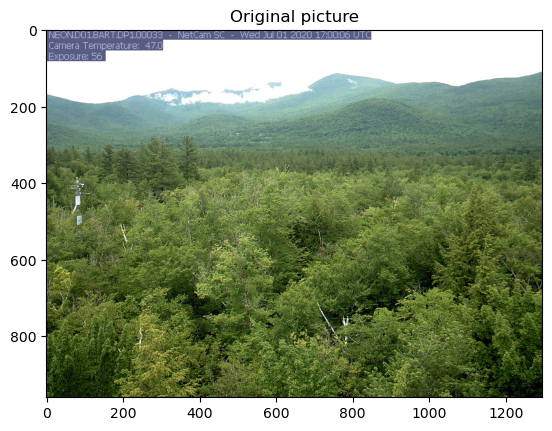

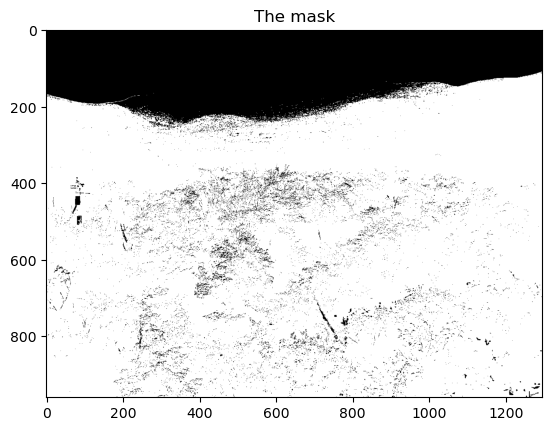

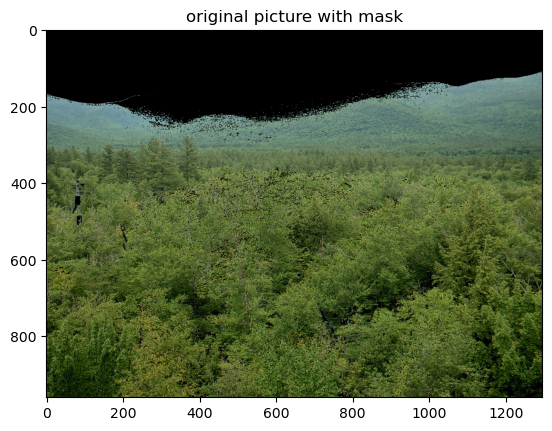

In [5]:
mid_img = "" # set the img you want at mid year here or it will become the first image in the year
mid_img = img_files[len(img_files)//2] if mid_img == "" else mid_img

mid_cv_img = cv2.imread(mid_img)

mid_rgb = cv2.cvtColor(mid_cv_img, cv2.COLOR_BGR2RGB)
mid_hsv = cv2.cvtColor(mid_cv_img, cv2.COLOR_BGR2HSV)
mid_mask = cv2.inRange(mid_hsv, (21,10,0), (110,255,173))

plt.imshow(mid_rgb)
plt.title("Original picture")
plt.show()

plt.imshow(mid_mask, cmap="gray")
plt.title("The mask")
plt.show()

mid_after_mask = cv2.bitwise_and(mid_rgb, mid_rgb, mask=mid_mask)
plt.imshow(mid_after_mask)
plt.title("original picture with mask")
plt.show()

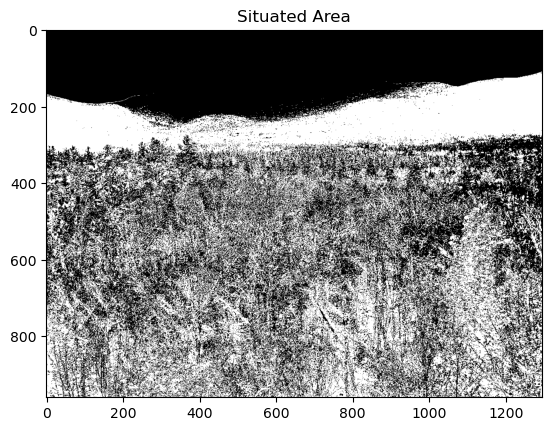

In [6]:
situated_area = cv2.bitwise_xor(begin_mask, mid_mask)
plt.imshow(situated_area, cmap="gray")
plt.title("Situated Area")
plt.show()

# calculate gcc and rcc in situated area

In [7]:
gcc_over_time = []
rcc_over_time = []

for image_name in img_files:
    cur_img = cv2.imread(image_name)
    cur_img_rgb = cv2.cvtColor(cur_img, cv2.COLOR_BGR2RGB)
    cur_img_after_mask = cv2.bitwise_and(cur_img_rgb, cur_img_rgb, mask=situated_area)
    red = np.sum(cur_img_after_mask[:,:,0])
    green = np.sum(cur_img_after_mask[:,:,1])
    blue = np.sum(cur_img_after_mask[:,:,2])
    gcc_over_time.append(green/(green+red+blue))
    rcc_over_time.append(red/(red+green+blue))

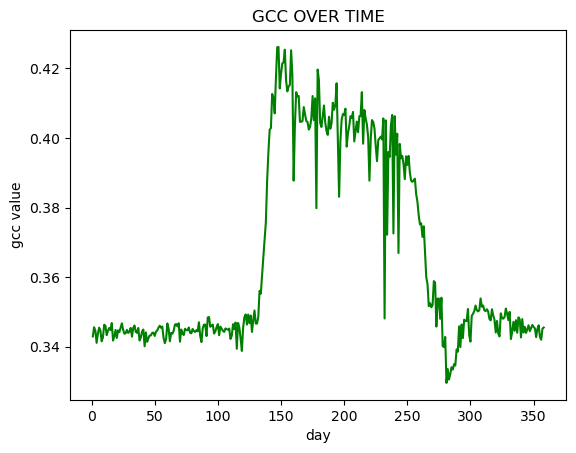

In [8]:
plt.title("GCC OVER TIME")
plt.xlabel("day")
plt.ylabel("gcc value")
plt.plot(np.arange(1,len(img_files)+1), gcc_over_time, color="green")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

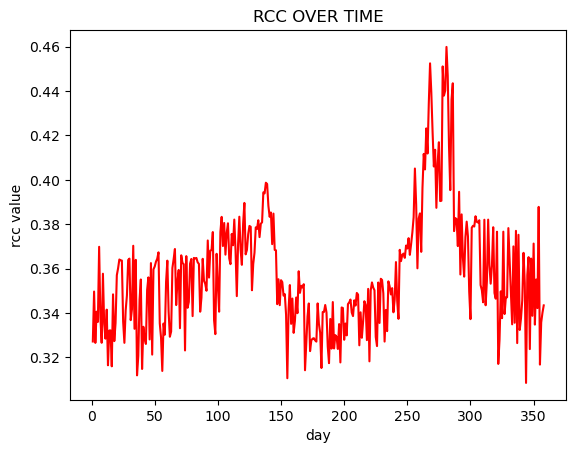

In [9]:
plt.title("RCC OVER TIME")
plt.xlabel("day")
plt.ylabel("rcc value")
plt.plot(np.arange(1,len(img_files)+1), rcc_over_time, color="red")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

# gcc and rcc include the evergreen ( june pic)

In [10]:
gcc_over_time1 = []
rcc_over_time1 = []

for image_name in img_files:
    cur_img = cv2.imread(image_name)
    cur_img_rgb = cv2.cvtColor(cur_img, cv2.COLOR_BGR2RGB)
    cur_img_after_mask = cv2.bitwise_and(cur_img_rgb, cur_img_rgb, mask=mid_mask)
    red = np.sum(cur_img_after_mask[:,:,0])
    green = np.sum(cur_img_after_mask[:,:,1])
    blue = np.sum(cur_img_after_mask[:,:,2])
    gcc_over_time1.append(green/(green+red+blue))
    rcc_over_time1.append(red/(red+green+blue))

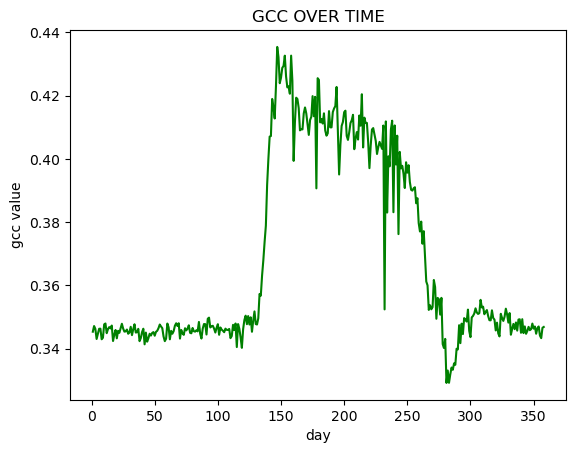

In [11]:
plt.title("GCC OVER TIME")
plt.xlabel("day")
plt.ylabel("gcc value")
plt.plot(np.arange(1,len(img_files)+1), gcc_over_time1, color="green")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

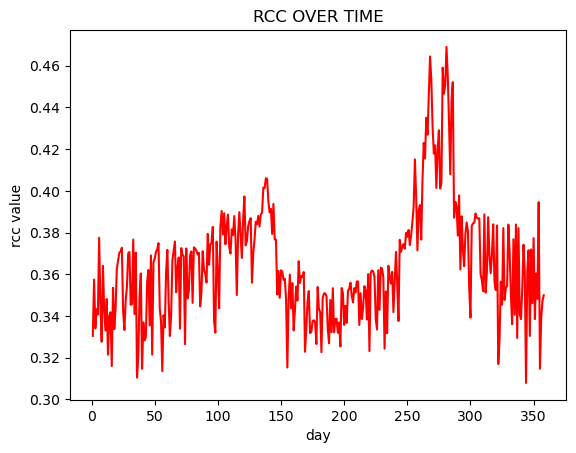

In [12]:
plt.title("RCC OVER TIME")
plt.xlabel("day")
plt.ylabel("rcc value")
plt.plot(np.arange(1,len(img_files)+1), rcc_over_time1, color="red")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

# Diff between with and without evergreen

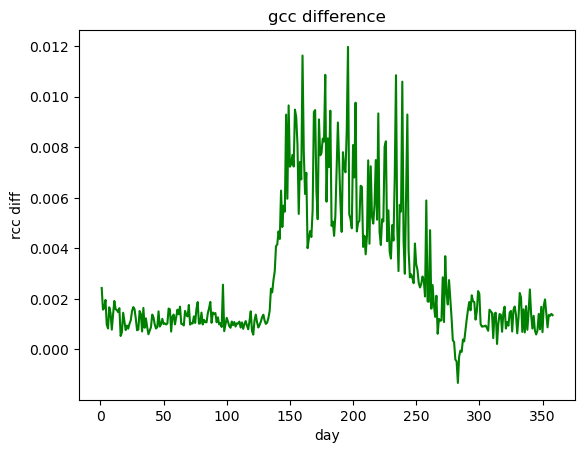

In [13]:
# with evergreen - without evergreen
gcc_difference = [element1 - element2 for (element1, element2) in zip(gcc_over_time1, gcc_over_time)]
plt.title("gcc difference")
plt.xlabel("day")
plt.ylabel("rcc diff")
plt.plot(np.arange(1,len(img_files)+1), gcc_difference, color="green")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

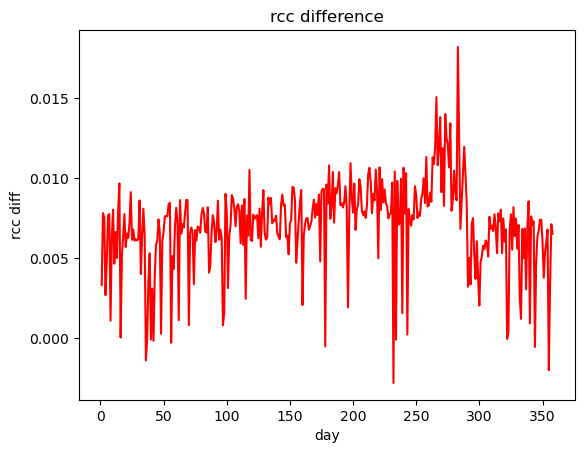

In [14]:
# with evergreen - without evergreen 
rcc_difference = [element1 - element2 for (element1, element2) in zip(rcc_over_time1, rcc_over_time)]
plt.title("rcc difference")
plt.xlabel("day")
plt.ylabel("rcc diff")
plt.plot(np.arange(1,len(img_files)+1), rcc_difference, color="red")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

# median of x days

In [15]:
def median_every_interval(array, interval_in_days):
    running_median = []
    window = []
    for element in array:
        window.append(element)
        if len(window) > interval_in_days:
            window.pop(0)
        if len(window) == interval_in_days:
            running_median.append(median(window))
    return running_median
        
        
def median(array):
    sortedArray = sorted(array)
    return (sortedArray[len(sortedArray)//2] + sortedArray[(len(sortedArray)+1)//2])/2

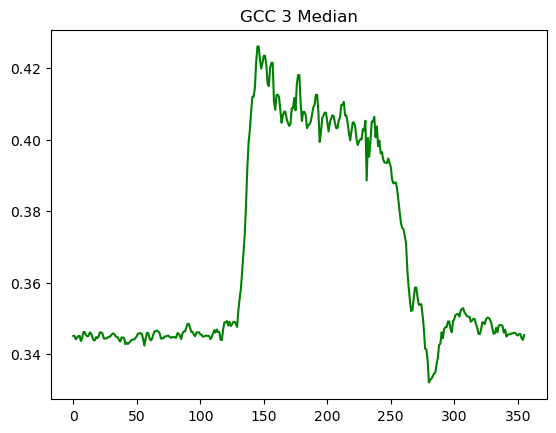

In [16]:
GCC3Median = median_every_interval(gcc_over_time, 3)
plt.plot(GCC3Median, color='green')
plt.title("GCC 3 Median")
plt.show()

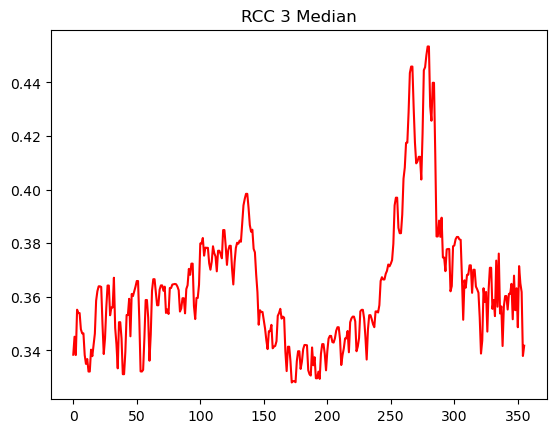

In [17]:
RCC3Median = median_every_interval(rcc_over_time, 3)
plt.plot(RCC3Median, color='red')
plt.title("RCC 3 Median")
plt.show()

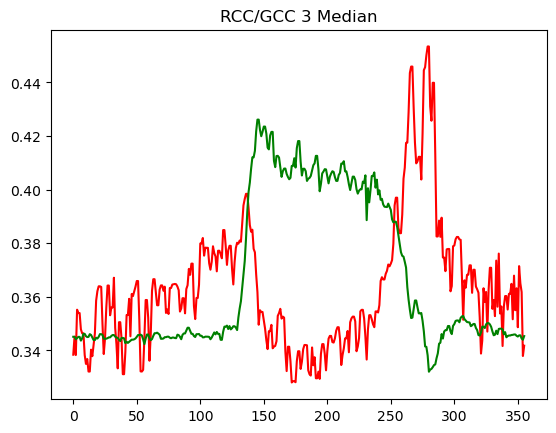

In [18]:
plt.plot(RCC3Median, color='red')
plt.plot(GCC3Median, color='green')
plt.title("RCC/GCC 3 Median")
plt.show()

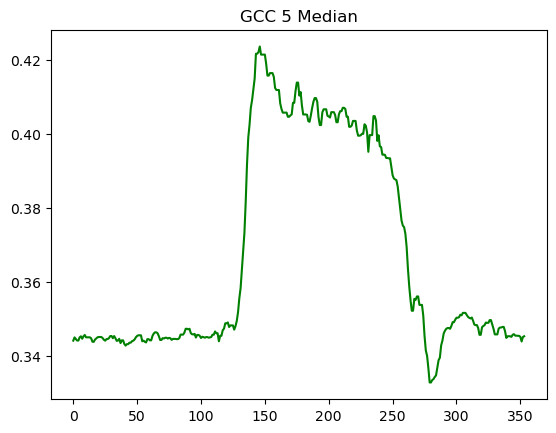

In [19]:
GCC5Median = median_every_interval(gcc_over_time, 5)
plt.plot(GCC5Median, color='green')
plt.title("GCC 5 Median")
plt.show()

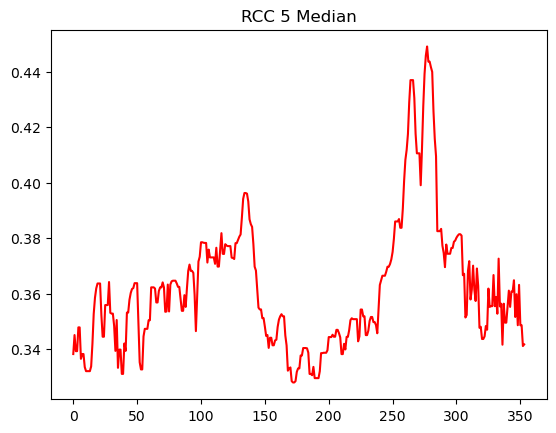

In [20]:
RCC5Median = median_every_interval(rcc_over_time, 5)
plt.plot(RCC5Median, color='red')
plt.title("RCC 5 Median")
plt.show()

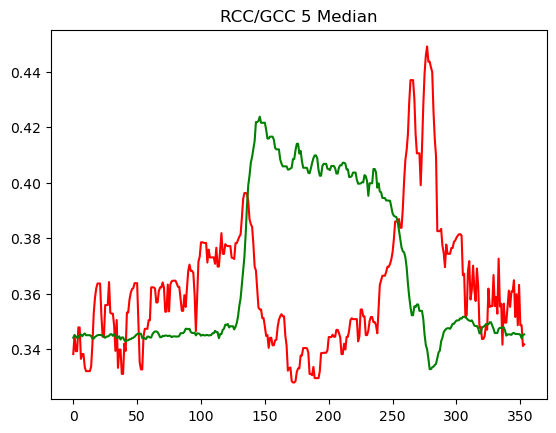

In [21]:
plt.plot(RCC5Median, color='red')
plt.plot(GCC5Median, color='green')
plt.title("RCC/GCC 5 Median")
plt.show()

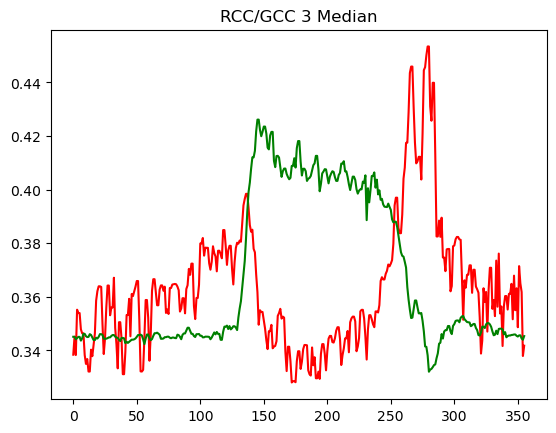

In [22]:
plt.plot(RCC3Median, color='red')
plt.plot(GCC3Median, color='green')
plt.title("RCC/GCC 3 Median")
plt.show()

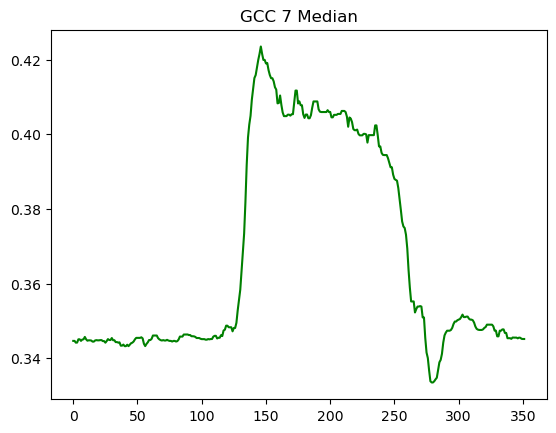

In [23]:
GCC7Median = median_every_interval(gcc_over_time, 7)
plt.plot(GCC7Median, color='green')
plt.title("GCC 7 Median")
plt.show()

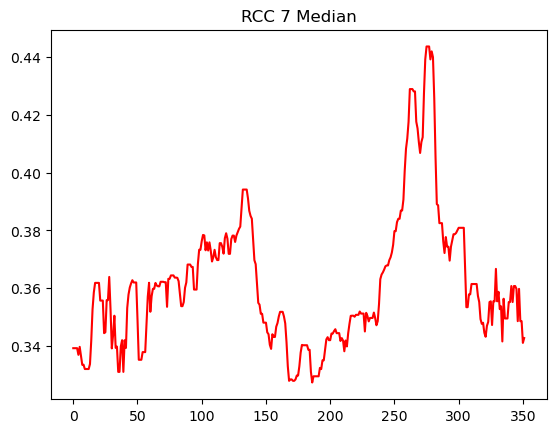

In [24]:
RCC7Median = median_every_interval(rcc_over_time, 7)
plt.plot(RCC7Median, color='red')
plt.title("RCC 7 Median")
plt.show()

In [25]:
# GCC3_drop2 = GCC3Median.copy()
# GCC3_drop2.pop()
# GCC3_drop2.pop()
# GCC5_drop1 = GCC5Median.copy()
# GCC5_drop1.pop()
# plt.plot(GCC3_drop2, GCC5_drop1, GCC7Median)
# plt.legend(["GCC3Median", "GCC5Median", "GCC7Median"])
# plt.show()